In [66]:
# aqui sera la serie de tiempo de Precios en ciudad capital de gasolina super servicio completo. 


# los datos a usar están en la carpeta Datos_precio 

In [67]:
import pandas as pd

# funcion para procesar los libros de excel
def load_year_data(year, table_header_start, last_row):
    df = pd.read_excel('Datos_precios/Precios-Promedio-Nacionales-Diarios-2025-1.xlsx',
                       sheet_name=str(year),
                       header= table_header_start,
                       usecols=['FECHA', 'Superior'])
    
    # todos los archivos tienen una linea extra entre el encabezado y los datos
    df = df.iloc[1:last_row]
    
    # Convertir fecha y asegurar formato correcto
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df['Superior'] = pd.to_numeric(df['Superior'], errors='coerce')
    
    return df

df_2021 = load_year_data("2021", 6, 366)
df_2022 = load_year_data("2022", 6, 366)
df_2023 = load_year_data("2023", 7, 366)
df_2024 = load_year_data("2024", 7, 367)
df_2025 = load_year_data("2025", 7, 195)

df_2021


# 2022

,FECHA,Superior
1,2021-01-01,21.91
2,2021-01-02,21.91
3,2021-01-03,21.91
4,2021-01-04,21.91
5,2021-01-05,21.91
...,...,...
361,2021-12-27,28.69
362,2021-12-28,28.69
363,2021-12-29,28.69
364,2021-12-30,28.69


In [68]:
df_2022


,FECHA,Superior
1,2022-01-01,28.69
2,2022-01-02,28.69
3,2022-01-03,28.79
4,2022-01-04,28.79
5,2022-01-05,28.79
...,...,...
361,2022-12-27,32.55
362,2022-12-28,32.55
363,2022-12-29,32.55
364,2022-12-30,32.55


In [69]:
df_2023

,FECHA,Superior
1,2023-01-01,32.55
2,2023-01-02,32.55
3,2023-01-03,32.56
4,2023-01-04,32.56
5,2023-01-05,32.56
...,...,...
361,2023-12-27,30.44
362,2023-12-28,30.44
363,2023-12-29,30.44
364,2023-12-30,30.44


In [70]:

df_2024

,FECHA,Superior
1,2024-01-01,30.44
2,2024-01-02,30.44
3,2024-01-03,30.47
4,2024-01-04,30.47
5,2024-01-05,30.47
...,...,...
362,2024-12-27,28.99
363,2024-12-28,28.99
364,2024-12-29,28.99
365,2024-12-30,28.95


In [71]:
df_2025

,FECHA,Superior
1,2025-01-01,28.95
2,2025-01-02,28.95
3,2025-01-03,28.95
4,2025-01-04,28.95
5,2025-01-05,28.95
...,...,...
190,2025-07-09,30.98
191,2025-07-10,30.98
192,2025-07-11,30.98
193,2025-07-12,30.98


## Ahora que ya se tienen los datos de los años de 2021 a 2025. Es necesario juntarlos

In [72]:
# Combinar todos los DataFrames en uno solo
df_completo = pd.concat([df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# Ordenar por fecha
df_completo = df_completo.sort_values('FECHA').reset_index(drop=True)

# Verificar el resultado
print("Primeras filas:")
print(df_completo.head())
print("\nÚltimas filas:")
print(df_completo.tail())
print(f"\nRango de fechas: {df_completo['FECHA'].min()} a {df_completo['FECHA'].max()}")
print(f"Total de registros: {len(df_completo)}")

Primeras filas:
       FECHA  Superior
0 2021-01-01     21.91
1 2021-01-02     21.91
2 2021-01-03     21.91
3 2021-01-04     21.91
4 2021-01-05     21.91

Últimas filas:
          FECHA  Superior
1650 2025-07-09     30.98
1651 2025-07-10     30.98
1652 2025-07-11     30.98
1653 2025-07-12     30.98
1654 2025-07-13     30.98

Rango de fechas: 2021-01-01 00:00:00 a 2025-07-13 00:00:00
Total de registros: 1655


# Analisis exploratorio del set completo

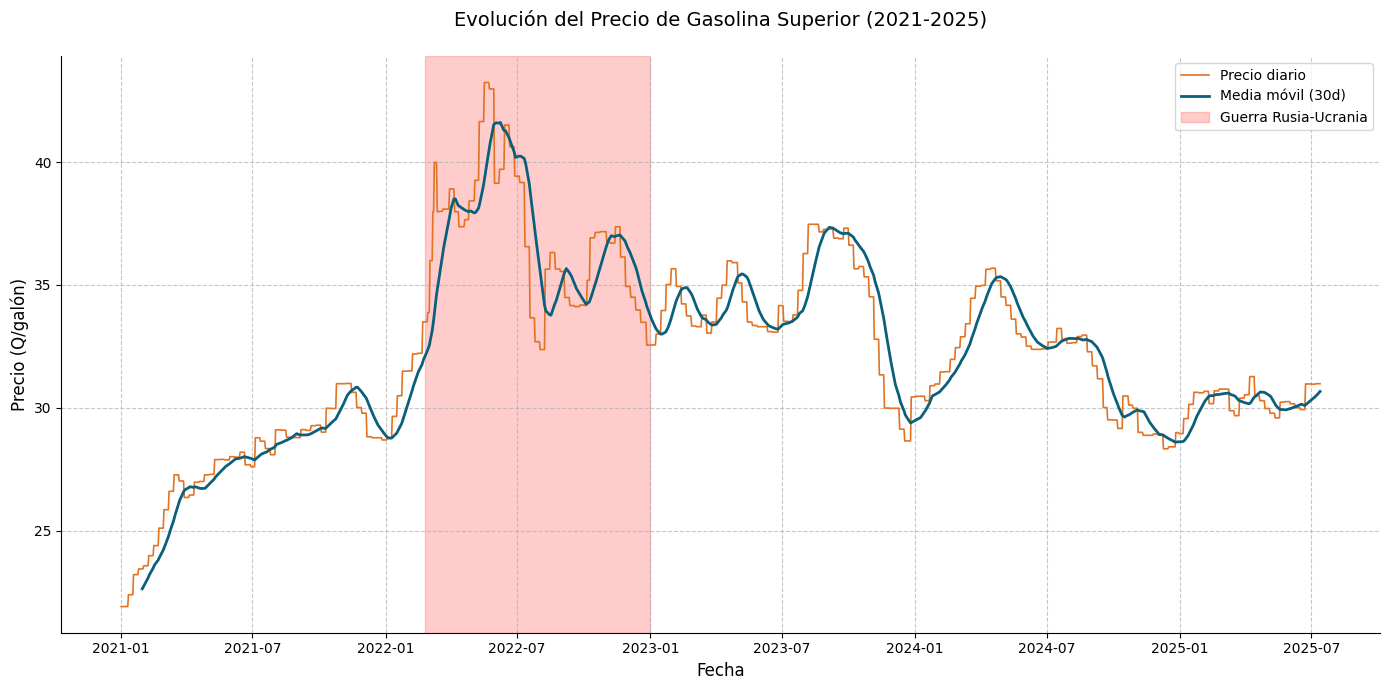

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(14, 7))

# Opción 1: Línea simple
plt.plot(df_completo['FECHA'], df_completo['Superior'], 
         color='#E37222', linewidth=1.2, label='Precio diario')

# Opción 2: Promedio móvil (suaviza la serie)
window_size = 30  # Promedio de 30 días
plt.plot(df_completo['FECHA'], df_completo['Superior'].rolling(window_size).mean(), 
         color='#0A5F7A', linewidth=2, label=f'Media móvil ({window_size}d)')

# Destacar eventos importantes
plt.axvspan(pd.to_datetime('2022-02-24'), pd.to_datetime('2022-12-31'), 
            alpha=0.2, color='red', label='Guerra Rusia-Ucrania')

plt.title('Evolución del Precio de Gasolina Superior (2021-2025)\n', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (Q/galón)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

## Gráfico de la serie y sus componentes

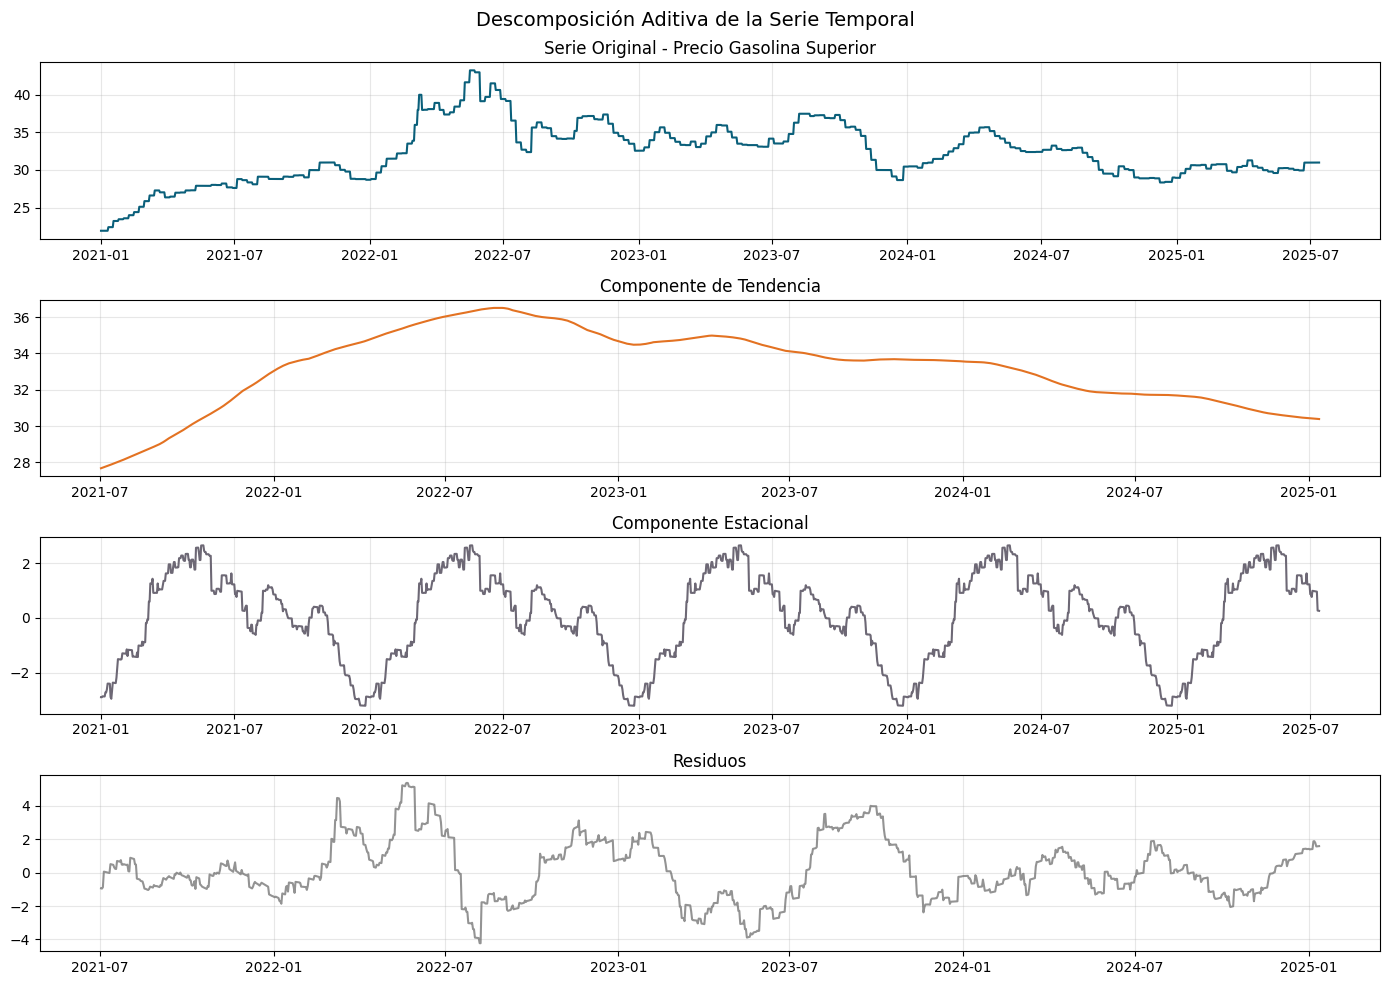

In [74]:


# Configurar la serie temporal (asegurando frecuencia diaria)
ts = df_completo.set_index('FECHA')['Superior'].asfreq('D').interpolate()

# Descomposición aditiva (modelo alternativo: multiplicative)
result = seasonal_decompose(ts, model='additive', period=365)

# Visualización mejorada
plt.figure(figsize=(14, 10))

# Serie Original
plt.subplot(4, 1, 1)
plt.plot(result.observed, color='#0A5F7A')
plt.title('Serie Original - Precio Gasolina Superior', fontsize=12)
plt.grid(alpha=0.3)

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(result.trend, color='#E37222')
plt.title('Componente de Tendencia', fontsize=12)
plt.grid(alpha=0.3)

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='#6D6875')
plt.title('Componente Estacional', fontsize=12)
plt.grid(alpha=0.3)

# Residuos
plt.subplot(4, 1, 4)
plt.plot(result.resid, color='#666666', alpha=0.7)
plt.title('Residuos', fontsize=12)
plt.grid(alpha=0.3)

plt.suptitle('Descomposición Aditiva de la Serie Temporal', fontsize=14)
plt.tight_layout()
plt.show()

## ¿Hay estacionalidad?


## ¿Hay tendencia?

## ¿Hay que hacer transoformaciones?